In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-hack-week-detect-credit-card-fraud/sample_submission.csv
/kaggle/input/global-hack-week-detect-credit-card-fraud/train.csv
/kaggle/input/global-hack-week-detect-credit-card-fraud/test.csv


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [41]:
train_raw = pd.read_csv("/kaggle/input/global-hack-week-detect-credit-card-fraud/train.csv")
test_raw = pd.read_csv("/kaggle/input/global-hack-week-detect-credit-card-fraud/test.csv")

In [42]:
train_raw.head()

,id,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,16979,3.346870,0.620101,0.945172,1.0,0.0,0.0,1.0,0
1,12430,14.482868,0.170185,1.084836,1.0,0.0,0.0,1.0,0
2,19872,5.740898,0.167525,3.969652,1.0,0.0,0.0,1.0,0
3,18763,4.098570,0.291850,0.084129,1.0,1.0,0.0,1.0,1
4,13547,7.539580,0.294439,2.890880,1.0,1.0,0.0,0.0,0


In [43]:
train_raw.shape

(18000, 9)

In [44]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18000 non-null  int64  
 1   distance_from_home              18000 non-null  float64
 2   distance_from_last_transaction  18000 non-null  float64
 3   ratio_to_median_purchase_price  18000 non-null  float64
 4   repeat_retailer                 18000 non-null  float64
 5   used_chip                       18000 non-null  float64
 6   used_pin_number                 18000 non-null  float64
 7   online_order                    18000 non-null  float64
 8   fraud                           18000 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.2 MB


it shows that there is no empty records

## checking on data accuracy

In [45]:
train_raw.describe()

,id,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,10004.217000,9.634483,1.194058,1.098892,0.928556,0.294222,0.047611,0.701222,0.086000
std,5777.289102,9.635835,2.642941,1.272369,0.257789,0.458379,0.220384,0.457735,0.280372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5017.750000,2.924786,0.144539,0.335077,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9994.500000,6.181911,0.436769,0.764678,1.000000,0.000000,0.000000,1.000000,0.000000
75%,15005.250000,12.882383,1.073838,1.420102,1.000000,1.000000,0.000000,1.000000,0.000000
max,19999.000000,62.099289,51.653566,28.341698,2.000000,7.000000,8.000000,1.000000,1.000000


In [46]:
test_raw.describe()

,id,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,9957.047000,10.008226,1.217473,1.120581,0.928500,0.282500,0.044500,0.690000
std,5742.027488,9.909044,2.791677,1.188091,0.257723,0.450328,0.206255,0.462609
min,26.000000,0.016038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4864.750000,2.978794,0.125701,0.352494,1.000000,0.000000,0.000000,0.000000
50%,10083.000000,6.661817,0.386775,0.792558,1.000000,0.000000,0.000000,1.000000
75%,14930.750000,13.249103,1.058811,1.424872,1.000000,1.000000,0.000000,1.000000
max,19992.000000,52.929156,43.858793,10.818129,1.000000,1.000000,1.000000,1.000000


on the discrete value columns, given that the columns are  indicating boolen values, it is inaccurate to have values besides 0 or 1, i.e. the max value for repeat_retailer is 2, which is making no sense.

In [47]:
train_process = train_raw[(train_raw['repeat_retailer'].isin([0,1]))& \
                          (train_raw['used_chip'].isin([0,1])) & \
                          (train_raw['used_pin_number'].isin([0,1])) & \
                          (train_raw['online_order'].isin([0,1])) & \
                          (train_raw['fraud'].isin([0,1])) \
                         ]

In [48]:
train_process.shape

(17995, 9)

In [49]:
train_process['repeat_retailer'] = train_process['repeat_retailer'].astype(int)
train_process['used_chip'] = train_process['used_chip'].astype(int)
train_process['used_pin_number'] = train_process['used_pin_number'].astype(int)
train_process['online_order'] = train_process['online_order'].astype(int)

In [50]:
train_process.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17995 entries, 0 to 17999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17995 non-null  int64  
 1   distance_from_home              17995 non-null  float64
 2   distance_from_last_transaction  17995 non-null  float64
 3   ratio_to_median_purchase_price  17995 non-null  float64
 4   repeat_retailer                 17995 non-null  int64  
 5   used_chip                       17995 non-null  int64  
 6   used_pin_number                 17995 non-null  int64  
 7   online_order                    17995 non-null  int64  
 8   fraud                           17995 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.4 MB


check outliers on discrete values

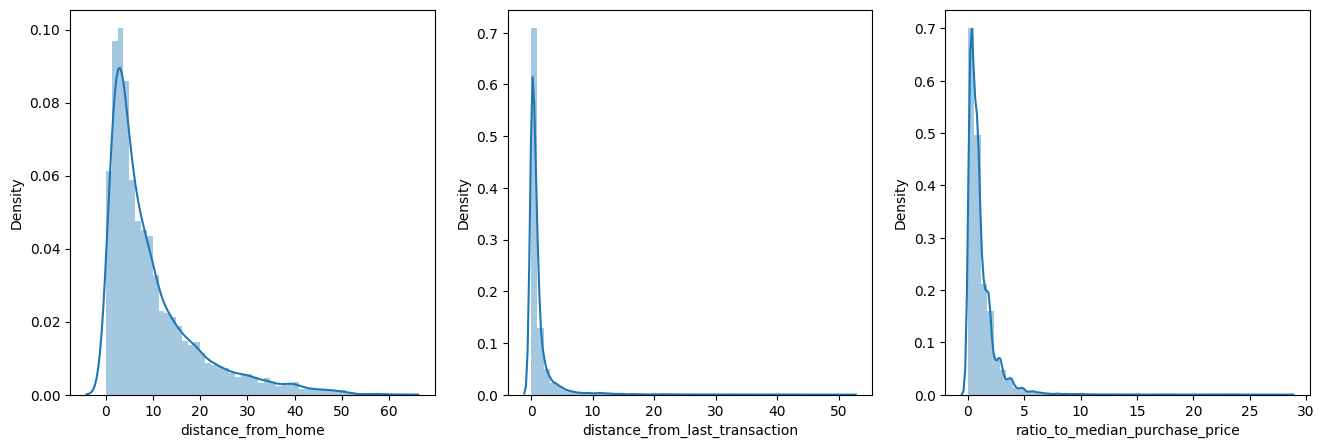

In [51]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1) 
sns.distplot(train_process['distance_from_home'])
plt.subplot(1,3,2)
sns.distplot(train_process['distance_from_last_transaction'])
plt.subplot(1,3,3)
sns.distplot(train_process['ratio_to_median_purchase_price'])
plt.show()

<Axes: >

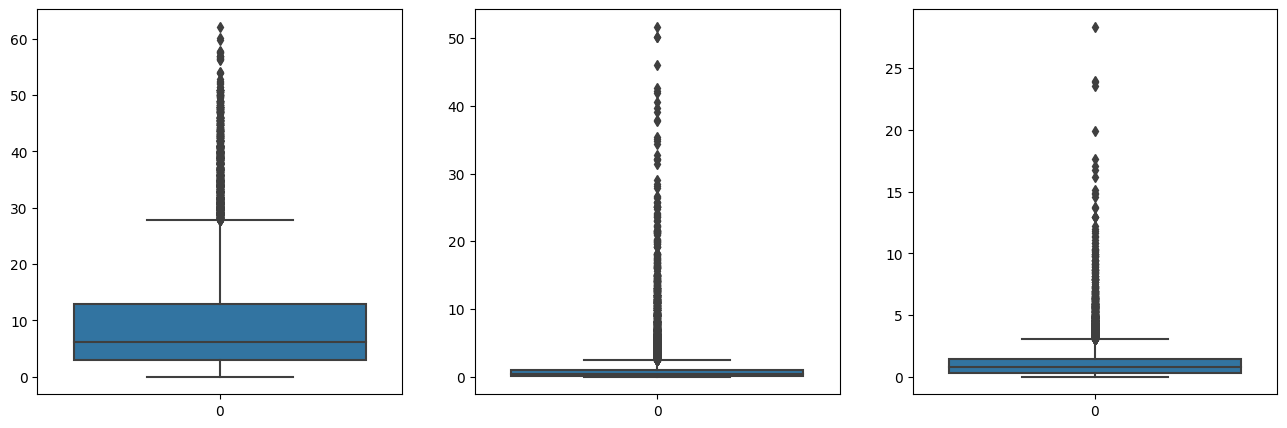

In [52]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(train_process['distance_from_home'])
plt.subplot(1,3,2)
sns.boxplot(train_process['distance_from_last_transaction'])
plt.subplot(1,3,3)
sns.boxplot(train_process['ratio_to_median_purchase_price'])

all the 3 columns are showing on a skewed distributions, especially on the "distance_from_last_transaction" and "ratio_to_median_purchase_price" columns, they both have a long tail. We would like to use IQR based filtering to exclude outliers.

In [53]:
percentile25_distanceHome = train_process['distance_from_home'].quantile(0.25)
percentile75_distanceHome = train_process['distance_from_home'].quantile(0.75)
IQR_distanceHome = percentile75_distanceHome - percentile25_distanceHome
upper_limit_distanceHome = percentile75_distanceHome + 1.5*IQR_distanceHome
lower_limit_distanceHome = percentile25_distanceHome - 1.5*IQR_distanceHome

percentile25_distance = train_process['distance_from_last_transaction'].quantile(0.25)
percentile75_distance = train_process['distance_from_last_transaction'].quantile(0.75)
IQR_distance = percentile75_distance - percentile25_distance
upper_limit_distance = percentile75_distance + 1.5*IQR_distance
lower_limit_distance = percentile25_distance - 1.5*IQR_distance

percentile25_ratio = train_process['ratio_to_median_purchase_price'].quantile(0.25)
percentile75_ratio = train_process['ratio_to_median_purchase_price'].quantile(0.75)
IQR_ratio = percentile75_ratio - percentile25_ratio
upper_limit_ratio = percentile75_ratio + 1.5*IQR_ratio
lower_limit_ratio = percentile25_ratio - 1.5*IQR_ratio

In [54]:
train_process2 = train_process[(train_process['distance_from_home']<=upper_limit_distanceHome) & (train_process['distance_from_home']>=lower_limit_distanceHome) ]
train_process2 = train_process2[(train_process2['distance_from_last_transaction']<=upper_limit_distance) & (train_process2['distance_from_last_transaction']>=lower_limit_distance) ]
train_process2 = train_process2[(train_process2['ratio_to_median_purchase_price']<=upper_limit_ratio) & (train_process2['ratio_to_median_purchase_price']>=lower_limit_ratio) ]

In [55]:
train_process2.shape

(14120, 9)

compare with the graphs after removing outliers

<Axes: >

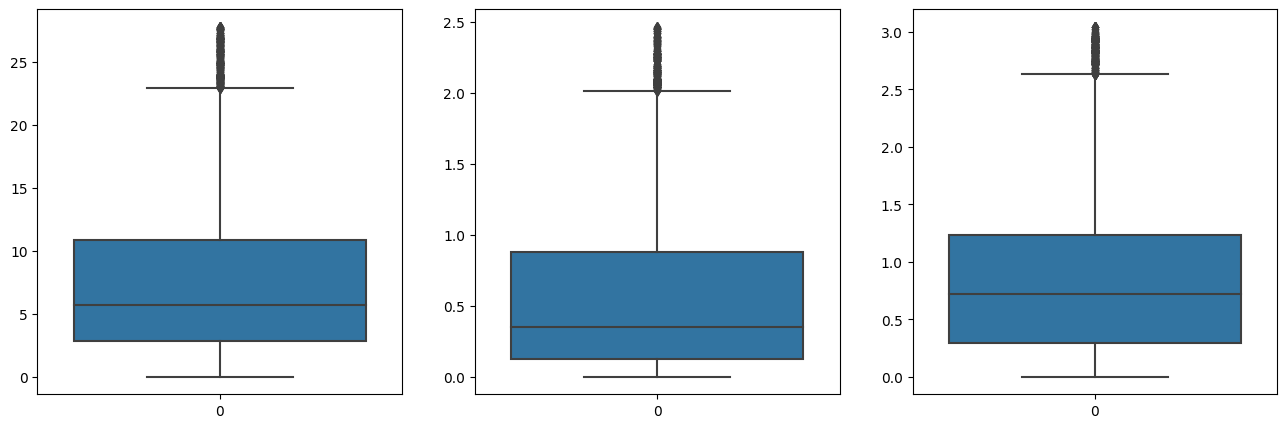

In [56]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(train_process2['distance_from_home'])
plt.subplot(1,3,2)
sns.boxplot(train_process2['distance_from_last_transaction'])
plt.subplot(1,3,3)
sns.boxplot(train_process2['ratio_to_median_purchase_price'])

In [57]:
X, y = train_process2.drop(['id','fraud'], axis=1), train_process2['fraud']

### data preprocessing

#### normalization on continous data

In [58]:
list(X.columns)

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'repeat_retailer',
 'used_chip',
 'used_pin_number',
 'online_order']

In [59]:
from sklearn import preprocessing
norm = preprocessing.MinMaxScaler()
continous_features =  list(X.columns)[0:3] 
discrete_features = list(X.columns)[3:7]

In [60]:
continous_features

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price']

In [61]:
from sklearn import preprocessing
norm = preprocessing.MinMaxScaler()

X[continous_features] = norm.fit_transform(X[continous_features])

Solving on data imbalance

In [62]:
import numpy as np
uniq, count = np.unique(y, return_counts=True)
dict(zip(uniq, count))

{0: 12936, 1: 1184}

we can see that there's an imbalance between the 0 and 1 output, i.e. fraud=0 records are ~11 times of fraud=1 records, hence we need to pay attention to this and would like to use over_sampling method to solve it. Not using UnderSampling instead because the sample size for fraud=1 is ~2k only, it is bit small for model building.

In [63]:
from imblearn.over_sampling import RandomOverSampler as OverSampler

In [64]:
os = OverSampler()
X, y = os.fit_resample(X, y)
X.shape, y.shape

((25872, 7), (25872,))

In [65]:
X_train, X_test,  y_train, y_test =  train_test_split(X, y, test_size = 0.2, shuffle = True)

we take a look at the processed continous features columns

<Axes: >

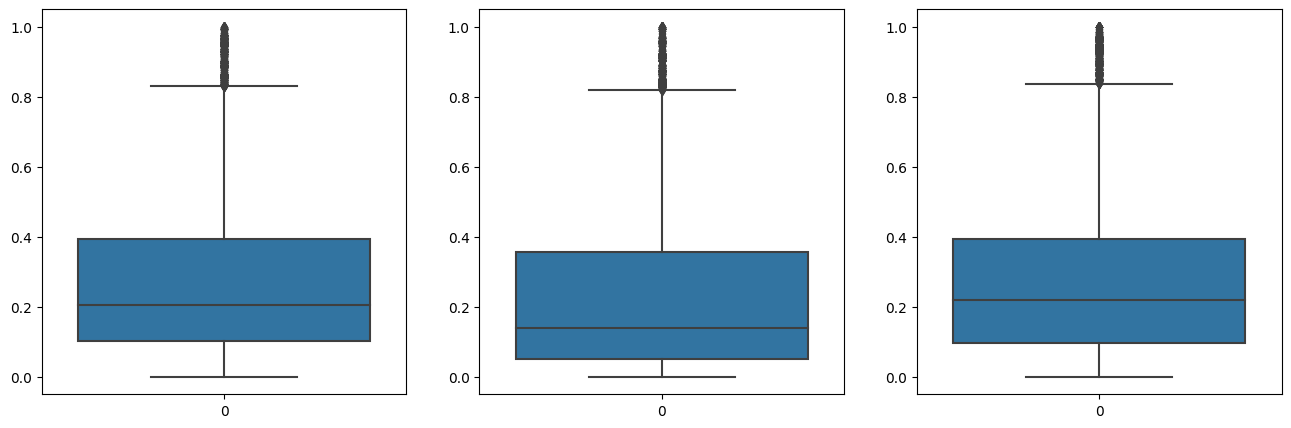

In [66]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(X_train.distance_from_home)
plt.subplot(1,3,2)
sns.boxplot(X_train.distance_from_last_transaction)
plt.subplot(1,3,3)
sns.boxplot(X_train.ratio_to_median_purchase_price)

### Build Models

for Fraud Detection, in the real life, we are actually more caring on the recall than precision. Example of:
- with a high False Negative, in the actual business, it means that a fraud case is not detected and is labelled as "not fraud" -> boom! it will bring in actual $$ loss.
- with a high False negative, in the actual business, it means that a user's actual payment is rejected -> it will receive customer complaints for sure, but not that bad compared to the above case. 

Hence, we would like to weigh higher on recall than precision, F0.5_score would be applied instead of F1_score.

we start with a basic Logistic Regression model

from F0.5 score and Accuracy score charts, we find a balance at fraud=1 class weightage at 0.915 vs fraud=0 class weightage at 0.085.

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, fbeta_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

f05_lr = fbeta_score(y_test, y_pred, beta=0.5)
accuracy_lr = accuracy_score(y_test, y_pred)
print("LogisticRegression f0.5 score is ",f05_lr)
print("LogisticRegression accuracy score is",accuracy_lr)

LogisticRegression f0.5 score is  0.5312616300707108
LogisticRegression accuracy score is 0.5095652173913043


RandomForest

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rf = RandomForestClassifier(n_estimators=10,
    max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

f05_rf = fbeta_score(y_test, y_pred, beta=0.5)

accuracy_rf = accuracy_score(y_test, y_pred)
print("RandomForestClassifier f0.5 score is ",f05_rf)
print("RandomForestClassifier accuracy score is",accuracy_rf)

RandomForestClassifier f0.5 score is  0.579417013682332
RandomForestClassifier accuracy score is 0.5671497584541063


SVM

In [69]:
from sklearn import svm
support = svm.LinearSVC(random_state=20)

support.fit(X_train, y_train)
y_pred= support.predict(X_test)

f05_svm = fbeta_score(y_test, y_pred,beta=0.5)
accuracy_svm = accuracy_score(y_test, y_pred)

print("SVM f0.5 score is ",f05_svm)
print("SVM accuracy score is",accuracy_svm)

SVM f0.5 score is  0.5312616300707108
SVM accuracy score is 0.5095652173913043


KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p = 2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

f05_knn = fbeta_score(y_test, y_pred, beta=0.5)
accuracy_knn = accuracy_score(y_test, y_pred)
print("KNN f0.5 score is ",f05_knn)
print("KNN accuracy score is",accuracy_knn)

KNN f0.5 score is  0.8035378246142266
KNN accuracy score is 0.8463768115942029


Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

f05_gnb = fbeta_score(y_test, y_pred, beta=0.5)
accuracy_gnb = accuracy_score(y_test, y_pred)
print("GaussianNB f0.5 score is ",f05_gnb)
print("GaussianNB accuracy score is",accuracy_gnb)

GaussianNB f0.5 score is  0.5487744856777242
GaussianNB accuracy score is 0.5066666666666667


XGBoost

In [72]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

f05_xgb = fbeta_score(y_test, y_pred, beta=0.5)
accuracy_xgb = accuracy_score(y_test, y_pred)
print("XGBoost f0.5 score is ",f05_xgb)
print("XGboost accuracy score is",accuracy_xgb)

XGBoost f0.5 score is  0.86591196737449
XGboost accuracy score is 0.891207729468599


**From the results above, XGBoost is having the best score among all from both F0.5 score and Accuracy**

In [73]:
predictions = xgb.predict(test_raw.drop(['id'], axis=1))
predictions

array([0, 0, 0, ..., 0, 1, 0])

In [74]:
submission_df = test_raw[['id']].copy()
submission_df['fraud'] = predictions.astype(int)
submission_df[['id', 'fraud']].to_csv('submission.csv', index=False)